# CO2 EMISSION

## Model Building and Model Evaluation using Machine Learning Algorithms

## 1. Import Necessary Libraries

In [2]:
!pip install xgboost

     -------------------------------------- 89.1/89.1 MB 320.0 kB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump, load

## 2. Load Data

In [4]:
emission_data=pd.read_csv('Final_Emission_Data.csv')
emission_data.head() 

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,compact,2.0,4,Automatic with select shift,Premium gasoline,8.5,196.0
1,compact,2.4,4,Manual,Premium gasoline,9.6,221.0
2,compact,1.5,4,Continuously variable,Premium gasoline,5.9,136.0
3,suv - small,3.5,6,Automatic with select shift,Premium gasoline,11.1,255.0
4,suv - small,3.5,6,Automatic with select shift,Premium gasoline,10.6,244.0


In [5]:
# Converting Categorical variables to ordinal
oc = OrdinalEncoder()
cols = ['vehicle_class','transmission','fuel_type']
emission_data[cols] = oc.fit_transform(emission_data[cols])
emission_data.head(11)

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,0.0,2.0,4,2.0,3.0,8.5,196.0
1,0.0,2.4,4,4.0,3.0,9.6,221.0
2,0.0,1.5,4,3.0,3.0,5.9,136.0
3,11.0,3.5,6,2.0,3.0,11.1,255.0
4,11.0,3.5,6,2.0,3.0,10.6,244.0
5,2.0,3.5,6,2.0,3.0,10.0,230.0
6,2.0,3.5,6,2.0,3.0,10.1,232.0
7,2.0,3.7,6,2.0,3.0,11.1,255.0
8,2.0,3.7,6,4.0,3.0,11.6,267.0
9,0.0,2.4,4,2.0,3.0,9.2,212.0


## 3. Model Building and Model Evaluation

In [6]:
X=emission_data.drop('co2_emissions', axis=1)
y=emission_data[['co2_emissions']]

In [7]:
X.shape, y.shape

((5981, 6), (5981, 1))

In [8]:
# Splitting data into train test data for validation
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=True)

In [9]:
X_train.shape, y_train.shape

((4784, 6), (4784, 1))

In [10]:
X_test.shape, y_test.shape

((1197, 6), (1197, 1))

## * Linear Regression

In [12]:
def run_LinearRegression(X_train, X_test, y_train, y_test):
    linear_model=LinearRegression()
    linear_model.fit(X_train, y_train)
    
    y_train_pred=linear_model.predict(X_train)
    y_test_pred=linear_model.predict(X_test)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [13]:
%%time
run_LinearRegression(X_train, X_test, y_train, y_test)

R-Square Score for Train data: 0.9029
Mean Square Error for Train data:: 331.9373
R-Square Score for Train data: 0.9023
Mean Square Error for Train data:: 342.8925
Wall time: 44 ms


### Assumptions Check

#### 1. Linearity Test

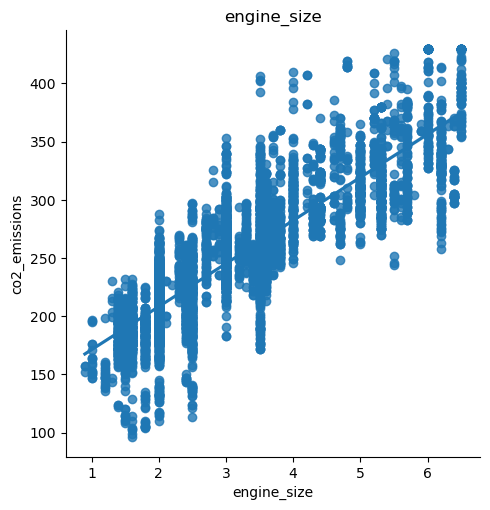


---------------------------------------------------------------------------------------------------------------


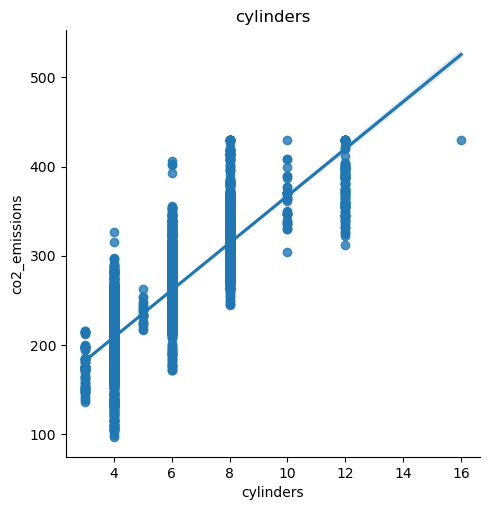


---------------------------------------------------------------------------------------------------------------


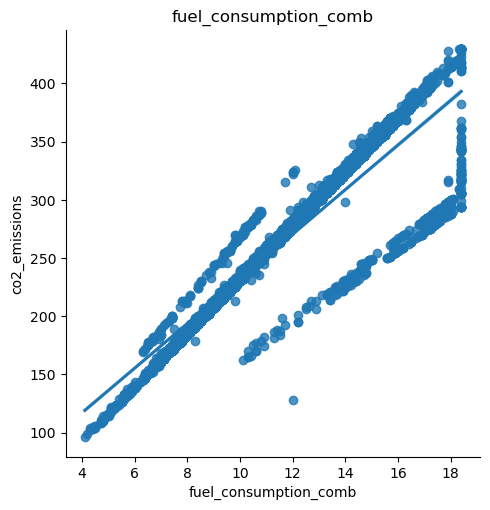


---------------------------------------------------------------------------------------------------------------


In [14]:
for i in ['engine_size','cylinders','fuel_consumption_comb']:
    sns.lmplot(x=i, y='co2_emissions', data=emission_data)
    plt.title(i)
    plt.show()
    print('\n---------------------------------------------------------------------------------------------------------------')

#### Linearity Test is Passed

#### 2. Normality Test

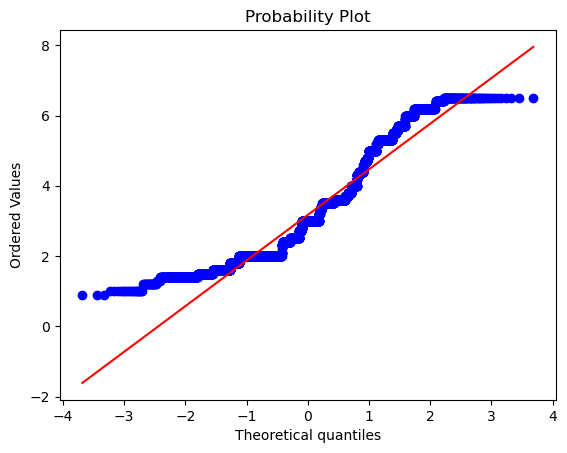

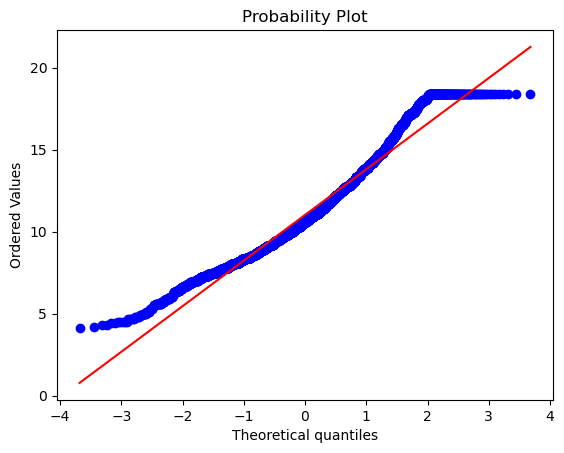

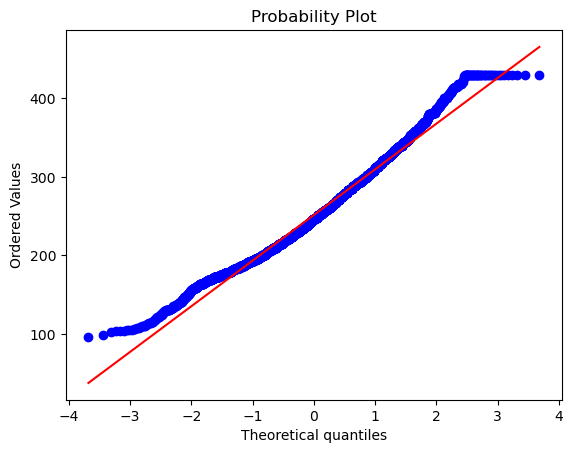

In [15]:
for i in ['engine_size','fuel_consumption_comb','co2_emissions']:
    stats.probplot(x=emission_data[i], dist='norm', plot=plt)
    plt.show()

#### Normality test is Passed

#### 3. Multicollinearity Test 

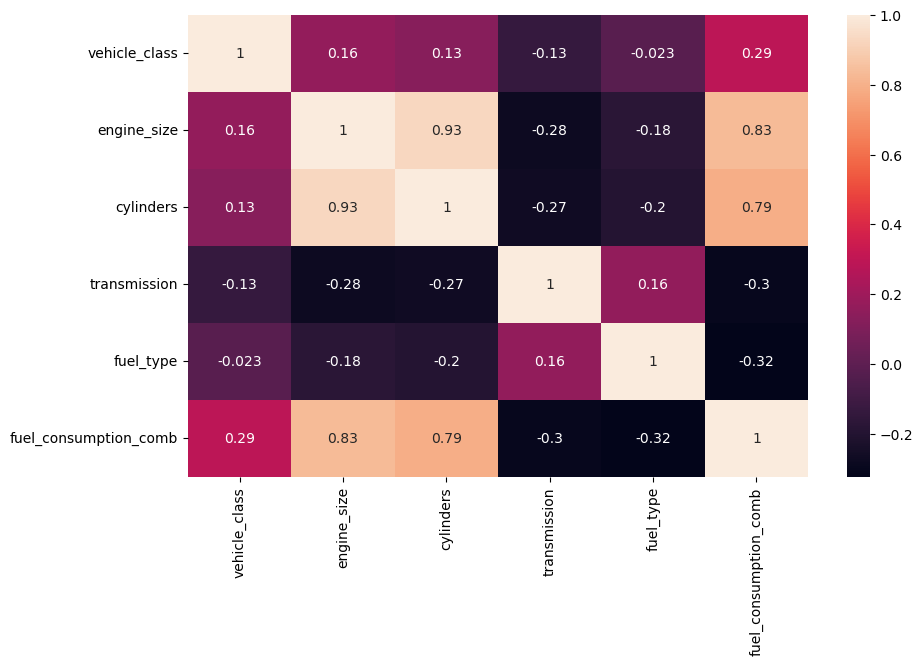

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True)
plt.show()

#### Multicollinearity test is Passed

#### 4. AutoRegresssion Test - Passed

#### 5. Homoscadasticity Check

In [17]:
linear_model=LinearRegression()
linear_model.fit(X,y)
y_pred=linear_model.predict(X)
error=y-y_pred

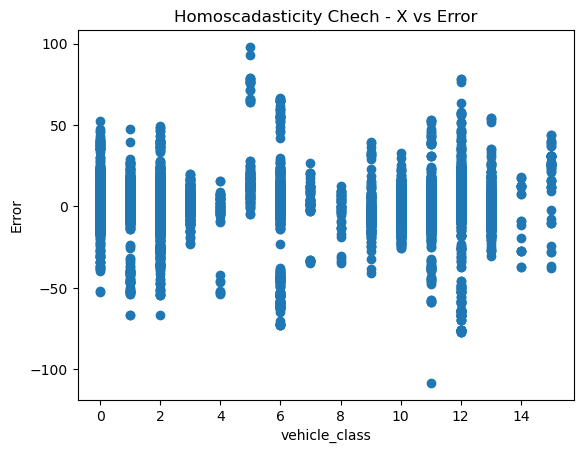

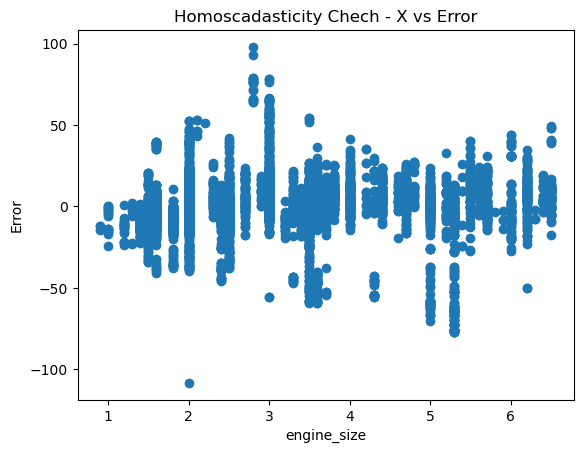

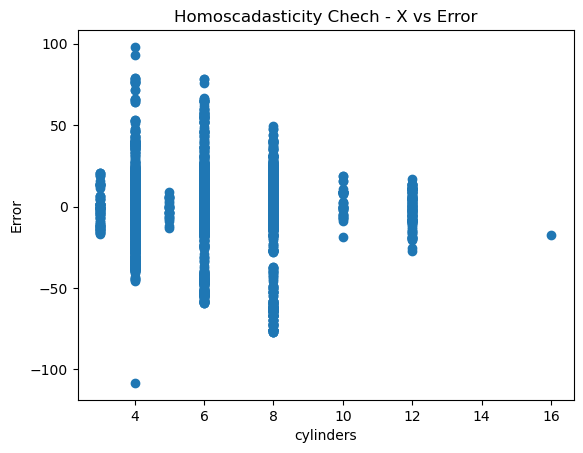

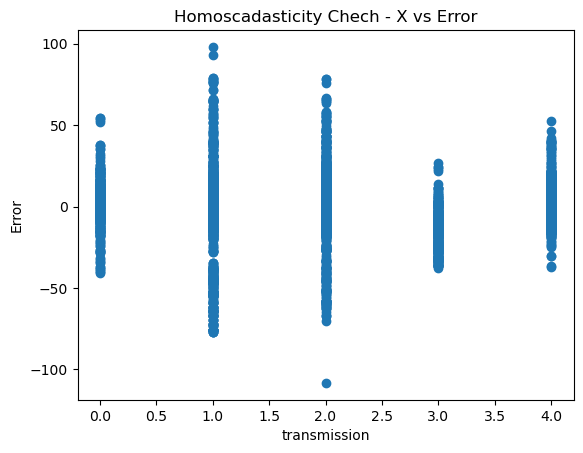

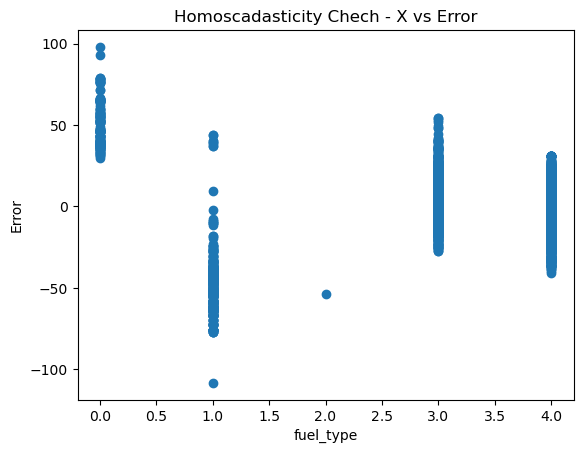

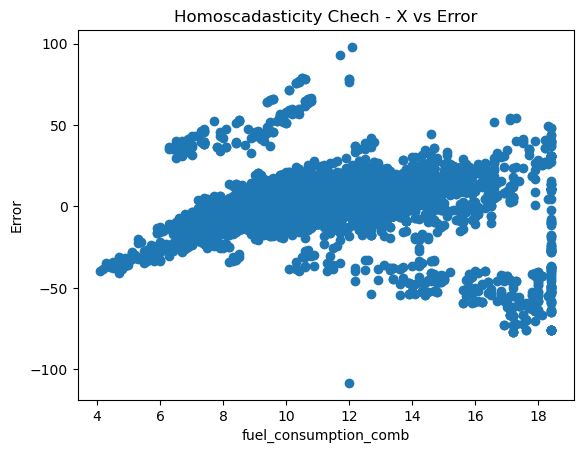

In [18]:
for i in X.columns:
    plt.scatter(x=X[i], y=error)
    plt.title('Homoscadasticity Chech - X vs Error')
    plt.xlabel(i)
    plt.ylabel('Error')
    plt.show()

#### Homoscadastisity test is Passed

#### 6. Zero Residual Mean Test

It is a plot b/w our **Actual output vs Predicted output**

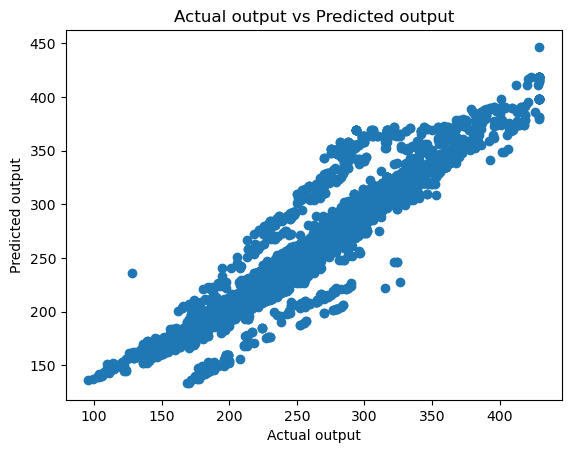

In [20]:
plt.scatter(x=y,y=y_pred,)
plt.title('Actual output vs Predicted output')
plt.xlabel('Actual output')
plt.ylabel('Predicted output')
plt.show()

#### Zero residual test is passed

### All the Assumptions test is Passed

## * Polynomial Regression

In [21]:
def run_PolynomialRegression(X_train, X_test, y_train, y_test):
    polynomial=PolynomialFeatures(degree=2)
    X_train_poly = polynomial.fit_transform(X_train)
    X_test_poly = polynomial.fit_transform(X_test)
    linear_model=LinearRegression()
    linear_model.fit(X_train_poly, y_train)
    
    y_train_pred=linear_model.predict(X_train_poly)
    y_test_pred=linear_model.predict(X_test_poly)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [22]:
%%time
run_PolynomialRegression(X_train, X_test, y_train, y_test)

R-Square Score for Train data: 0.967
Mean Square Error for Train data:: 112.7665
R-Square Score for Train data: 0.9649
Mean Square Error for Train data:: 123.301
Wall time: 65.3 ms


## Lasso Regression

In [27]:
def run_LassoRegression(X_train, X_test, y_train, y_test):
    lasso_regressor=Lasso()
    lasso_regressor.fit(X_train, y_train)
    
    y_train_pred=lasso_regressor.predict(X_train)
    y_test_pred=lasso_regressor.predict(X_test)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [28]:
%%time
run_LassoRegression(X_train, X_test, y_train, y_test)

R-Square Score for Train data: 0.9022
Mean Square Error for Train data:: 334.4178
R-Square Score for Train data: 0.9005
Mean Square Error for Train data:: 349.1125
Wall time: 20.5 ms


## Ridge Regression

In [29]:
def run_RidgeRegression(X_train, X_test, y_train, y_test):
    ridge_regressor=Ridge()
    ridge_regressor.fit(X_train, y_train)
    
    y_train_pred=ridge_regressor.predict(X_train)
    y_test_pred=ridge_regressor.predict(X_test)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [30]:
%%time
run_RidgeRegression(X_train, X_test, y_train, y_test)

R-Square Score for Train data: 0.9029
Mean Square Error for Train data:: 331.9374
R-Square Score for Train data: 0.9023
Mean Square Error for Train data:: 342.8954
Wall time: 2.32 ms


## Decision Tree 

### GridSearchCV Technique to Tune Hyper-Parameters

In [34]:
#Exhaustive search over specified parameter values for an estimator.
decision_tree_model=DecisionTreeRegressor()

grid_search=GridSearchCV(estimator=decision_tree_model, 
                         param_grid={'criterion':["mse", "friedman_mse", "mae", "poisson"],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]}, 
                         cv=5)

grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: 

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:3

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:3

{'criterion': 'mse', 'max_depth': 8}
0.9936584828393942


C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [52]:
def run_Decision_Tree(X_train, X_test, y_train, y_test):
    dt_regressor=DecisionTreeRegressor(criterion= 'mse', max_depth= 9, random_state=10)
    dt_regressor.fit(X_train, y_train)
    
    y_train_pred=dt_regressor.predict(X_train)
    y_test_pred=dt_regressor.predict(X_test)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [53]:
%%time
run_Decision_Tree(X_train, X_test, y_train, y_test)

R-Square Score for Train data: 0.998
Mean Square Error for Train data:: 6.9938
R-Square Score for Train data: 0.9921
Mean Square Error for Train data:: 27.759
Wall time: 21.3 ms


C:\Users\Anil\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


## * Random Forest

In [54]:
def run_Random_Forest(X_train, X_test, y_train, y_test):
    rf_regressor=RandomForestRegressor(random_state=10)
    rf_regressor.fit(X_train, y_train)
    
    y_train_pred=rf_regressor.predict(X_train)
    y_test_pred=rf_regressor.predict(X_test)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [55]:
%%time
run_Random_Forest(X_train, X_test, y_train, y_test)

C:\Users\Anil\AppData\Local\Temp\ipykernel_21900\970017094.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


R-Square Score for Train data: 0.9987
Mean Square Error for Train data:: 4.4385
R-Square Score for Train data: 0.9952
Mean Square Error for Train data:: 16.7666
Wall time: 759 ms


## * Gradient Boosting

In [56]:
def run_Gradient_Boosting(X_train, X_test, y_train, y_test):
    gb_regressor=GradientBoostingRegressor(random_state=10)
    gb_regressor.fit(X_train, y_train)
    
    y_train_pred=gb_regressor.predict(X_train)
    y_test_pred=gb_regressor.predict(X_test)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [57]:
%%time
run_Gradient_Boosting(X_train, X_test, y_train, y_test)

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-Square Score for Train data: 0.9964
Mean Square Error for Train data:: 12.1697
R-Square Score for Train data: 0.9952
Mean Square Error for Train data:: 16.6851
Wall time: 240 ms


## * Xtreme Gradient Boosting

In [58]:
def run_Xtra_Gradient_Boosting(X_train, X_test, y_train, y_test):
    xgb_regressor=xgb.XGBRegressor(random_state=10)
    xgb_regressor.fit(X_train, y_train)
    
    y_train_pred=xgb_regressor.predict(X_train)
    y_test_pred=xgb_regressor.predict(X_test)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [59]:
%%time
run_Xtra_Gradient_Boosting(X_train, X_test, y_train, y_test)

R-Square Score for Train data: 0.9985
Mean Square Error for Train data:: 5.1915
R-Square Score for Train data: 0.9962
Mean Square Error for Train data:: 13.4547
Wall time: 157 ms


## * Support Vector Machine

In [60]:
def run_Support_Vector_Machine(X_train, X_test, y_train, y_test):
    svm_regressor=SVR(C=1.0, epsilon=0.1)
    svm_regressor.fit(X_train, y_train)
    
    y_train_pred=svm_regressor.predict(X_train)
    y_test_pred=svm_regressor.predict(X_test)
    
    print('R-Square Score for Train data:', round(r2_score(y_train, y_train_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_train, y_train_pred),4))
    print('R-Square Score for Train data:', round(r2_score(y_test, y_test_pred),4))
    print('Mean Square Error for Train data::', round(mean_squared_error(y_test, y_test_pred),4))

In [61]:
%%time
run_Support_Vector_Machine(X_train, X_test, y_train, y_test)

C:\Users\Anil\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-Square Score for Train data: 0.9094
Mean Square Error for Train data:: 309.7146
R-Square Score for Train data: 0.9058
Mean Square Error for Train data:: 330.5675
Wall time: 3.4 s


**Best Model**: Xtreme Gradient Boosting

## 6. Model Deployment

In [62]:
rf_regressor=RandomForestRegressor(random_state=10)
rf_regressor.fit(X_train, y_train)

C:\Users\Anil\AppData\Local\Temp\ipykernel_21900\2038062457.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [63]:
# Deploying xgb model to pickle file
dump(rf_regressor,open('model.pkl','wb'))

In [64]:
# Loading the pickle file
loaded_model=load(open('model.pkl','rb'))

In [65]:
y_pred=loaded_model.predict(X_test)

In [66]:
r2_score(y_test, y_pred)

0.9952228231852877

## 7. User Interface 

In [67]:
df=pd.read_csv('Final_Emission_Data.csv')
df.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,compact,2.0,4,Automatic with select shift,Premium gasoline,8.5,196.0
1,compact,2.4,4,Manual,Premium gasoline,9.6,221.0
2,compact,1.5,4,Continuously variable,Premium gasoline,5.9,136.0
3,suv - small,3.5,6,Automatic with select shift,Premium gasoline,11.1,255.0
4,suv - small,3.5,6,Automatic with select shift,Premium gasoline,10.6,244.0


In [69]:
i1 = input("Enter vehicle class :")
i2 = float(input("Enter engine size :"))
i3 = float(input("Enter Number of cylinders :"))
i4 = input("Enter Transmission type :")
i5 = input("Enter Fuel type :")
i6 = float(input("Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :"))

input_data = pd.DataFrame({'vehicle_class':i1,'engine_size':i2,'cylinders':i3,
                           'transmission':i4,'fuel_type':i5,
                           'fuel_consumption_comb':i6},index=[1])

input_data['vehicle_class']  =input_data['vehicle_class'].map({'compact':0.0,'full-size':1.0,'mid-size':2.0,'minicompact':3.0,'minivan':4.0,
                                                               'pickup truck - small':5.0,'pickup truck - standard':6.0,'special purpose vehicle':7.0,
                                                               'station wagon - mid-size':8.0,'station wagon - small':9.0,'subcompact':10.0,
                                                               'suv - small':11.0, 'suv - standard':12.0,'two-seater':13.0,'van - cargo':14.0,
                                                               'van - passenger':15.0})
input_data['transmission']  =input_data['transmission'].map({'Automatic':0.0,'Automated manual':1.0,'Automatic with select shift':2.0,'Continuously variable':3.0,'Manual':4.0})
input_data['fuel_type']  =input_data['fuel_type'].map({'Diesel':0.0,'Ethanol (E85)':1.0,'Natural gas':2.0,'Premium gasoline':3.0,'Regular gasoline':4.0})

pred =loaded_model.predict(input_data)
print("The Co2 emmitted from your car is {} in grams per kilometer.".format(pred))

Enter vehicle class :compact
Enter engine size :2.4
Enter Number of cylinders :4
Enter Transmission type :Manual
Enter Fuel type :Premium gasoline
Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :9.6
The Co2 emmitted from your car is [221.214] in grams per kilometer.
